# 다양체 학습 (Manifold Learning)

* 높은 차원의 데이터를 저차원으로 축소하는 방법
    - Demensionality Reduction

![manifold](https://scikit-learn.org/stable/_images/sphx_glr_plot_compare_methods_0011.png)

* 고차원 데이터를 2차원 또는 3차원으로 축소해 시각화에 활용할 수 있음
* 차원 축소 과정에서 중요하지 않은 정보는 버려지고 중요한 정보만 남기 때문에 **데이터 정제**에 활용 가능

## 데이터 생성 및 시각화 함수

In [1]:
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])

from sklearn import manifold
from sklearn import random_projection
from sklearn import datasets

In [3]:
s_curve, color = datasets.make_s_curve(1000, random_state=0)

In [4]:
digits, labels = datasets.load_digits(return_X_y=True)
random_proj = random_projection.SparseRandomProjection(n_components=3, random_state=0)
projected_digits = random_proj.fit_transform(digits)

In [5]:
def min_max_scale(x):
    min_value, max_value = np.min(x, 0), np.max(x, 0)
    x = (x - min_value) / (max_value - min_value)
    return x

In [6]:
def plot_s_curve(s_curve, color, position, projection):
    s_curve = min_max_scale(s_curve)
    if projection == '3d':
        ax = plt.subplot(position, projection=projection)
        ax.scatter(s_curve[:, 0], s_curve[:, 1], s_curve[:, 2], c = color, cmap= plt.cm.Spectral)
        ax.view_init(4, -72)
    elif projection =='2d':
        ax = plt.subplot(position)
        ax.scatter(s_curve[:, 0], s_curve[:, 1], c=color, cmap=plt.cm.Spectral)
    
    

In [7]:
def plot_digits(digits, labels, position, projection):
    digits = min_max_scale(digits)
    if projection == '3d':
        ax = plt.subplot(position, projection=projection)
        for i in range(digits.shape[0]):
            ax.text(digits[i, 0], digits[i, 1], digits[i, 2], str(labels[i]), 
                    color=plt.cm.Set1(labels[i] /10.), 
                    fontdict = {'weight':'bold', 'size':9})
        
        ax.view_init(4, -72)
        
    elif projection == '2d':
        ax = plt.subplot(position)
        for i in range(digits.shape[0]):
            ax.text(digits[i, 0], digits[i, 1], str(labels[i]), 
                    color=plt.cm.Set1(labels[i] /10.), 
                    fontdict = {'weight':'bold', 'size':9})
        
        
        

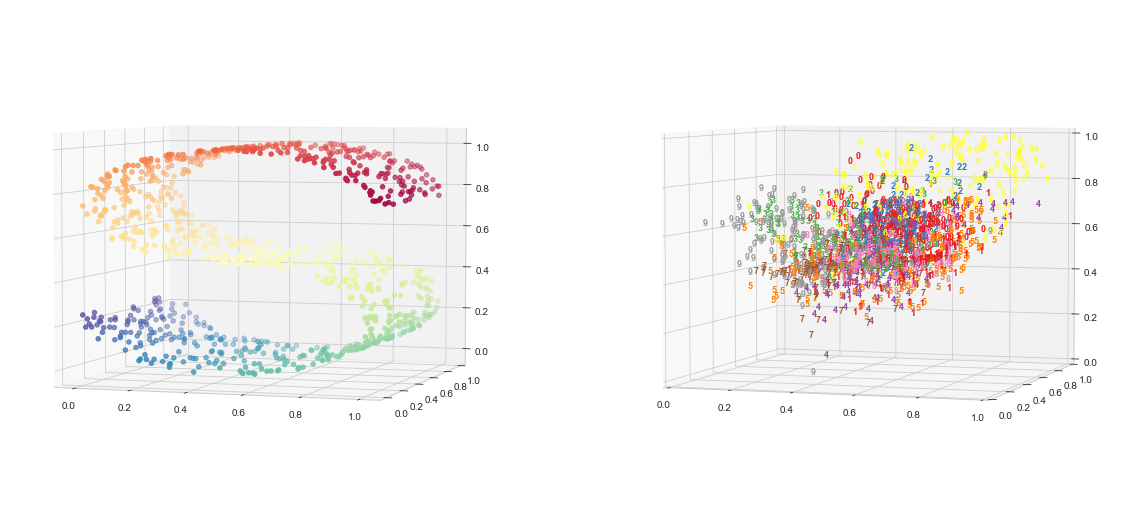

In [8]:
fig = plt.figure(figsize=(20, 10))
plot_s_curve(s_curve, color, 121, '3d')
plot_digits(projected_digits, labels, 122, '3d')

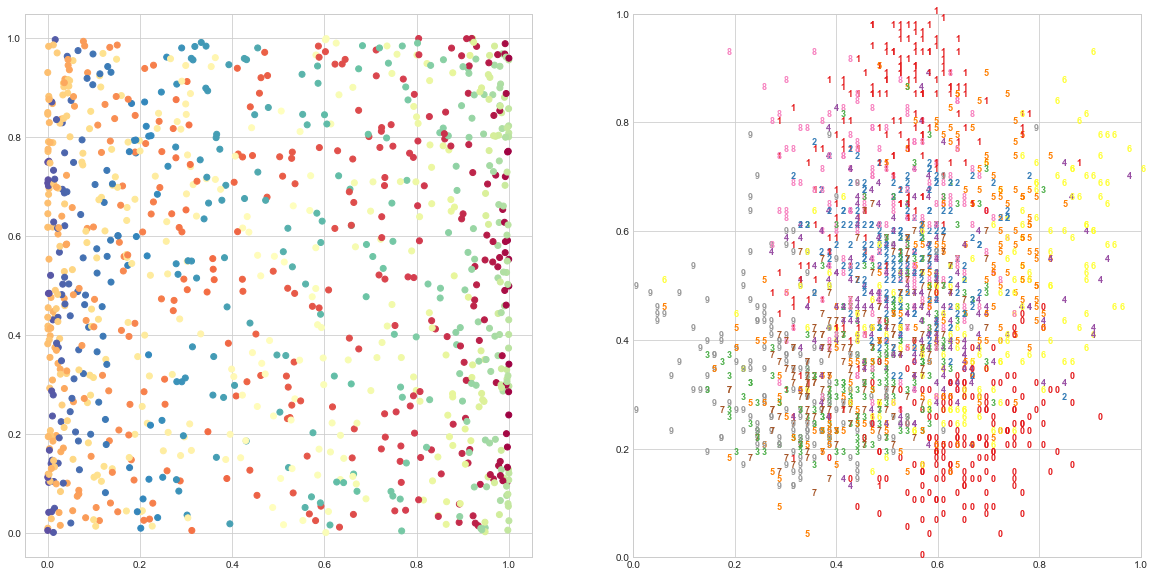

In [9]:
fig = plt.figure(figsize=(20, 10))
plot_s_curve(s_curve, color, 121, '2d')
plot_digits(projected_digits, labels, 122, '2d')

## Locally Linear Embedding (LLE)

* 국소 이웃 거리를 보존하는 저차원 임베딩을 찾음

In [10]:
s_curve_lle = manifold.LocallyLinearEmbedding(n_neighbors=30, n_components=2,
                         method='standard', random_state=0).fit_transform(s_curve)
digits_lle = manifold.LocallyLinearEmbedding(n_neighbors=30, n_components=3,
                         method='standard', random_state=0).fit_transform(digits)

위에 n_components 를 2, 3으로 했기 때문에 2d, 3d로 표현

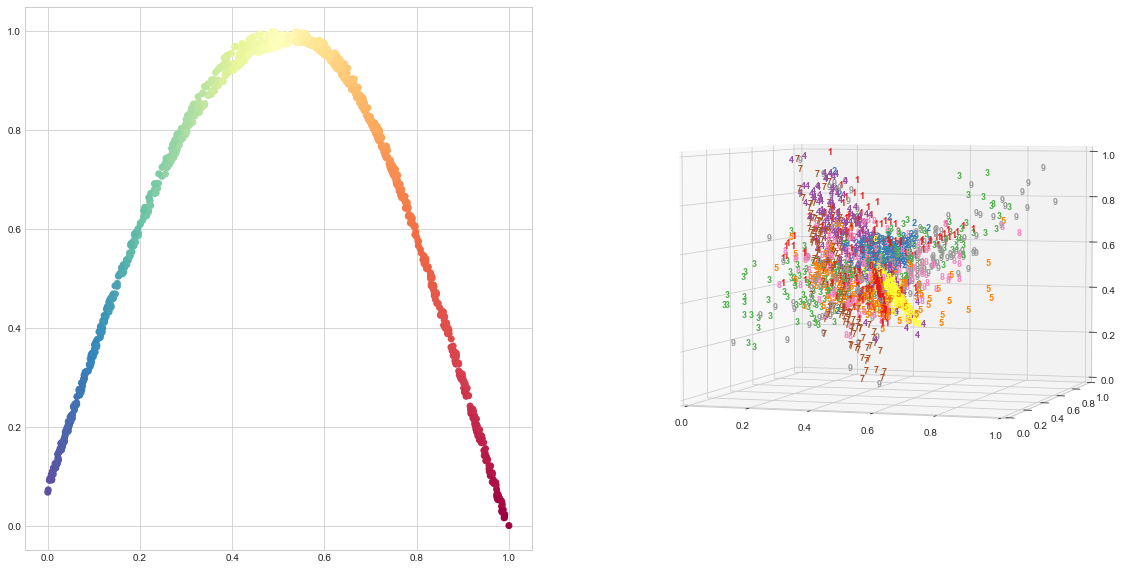

In [11]:
fig = plt.figure(figsize=(20, 10))
plot_s_curve(s_curve_lle, color, 121, '2d')
plot_digits(digits_lle, labels, 122, '3d')

## Local Tangent Space Alignment (LTSA)

* 탄젠트 공간을 통해 각 이웃의 국소 성질을 특성화
* 국소 탄젠트 공간을 정렬

In [12]:
s_curve_ltsa = manifold.LocallyLinearEmbedding(n_neighbors=30, n_components=2,
                         method='ltsa', random_state=0).fit_transform(s_curve)
digits_ltsa = manifold.LocallyLinearEmbedding(n_neighbors=30, n_components=3,
                         method='ltsa', random_state=0).fit_transform(digits)

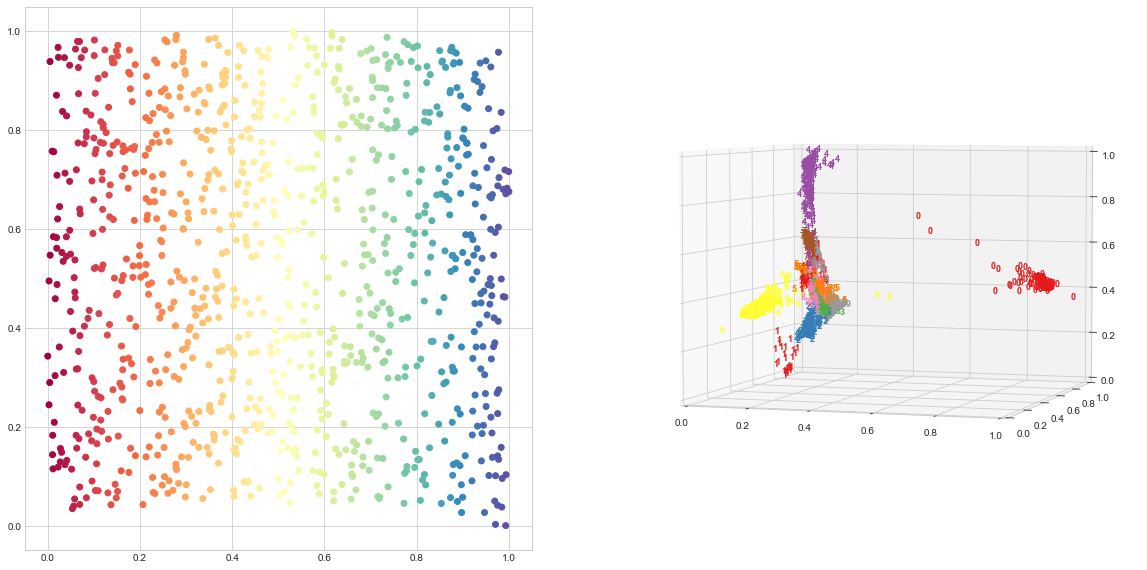

In [13]:
fig = plt.figure(figsize=(20, 10))
plot_s_curve(s_curve_ltsa, color, 121, '2d')
plot_digits(digits_ltsa, labels, 122, '3d')

## Hessian Eigenmapping

* LLE의 문제를 해결한 다른 방법
* 국소 선형 구조를 복원하기 위해 각 이웃에서 hessian 기반의 이차 형태를 중심으로 회전

In [14]:
s_curve_hessian = manifold.LocallyLinearEmbedding(n_neighbors=30, n_components=2,
                         method='hessian', random_state=0).fit_transform(s_curve)
digits_hessian = manifold.LocallyLinearEmbedding(n_neighbors=30, n_components=3,
                         method='hessian', random_state=0).fit_transform(digits)

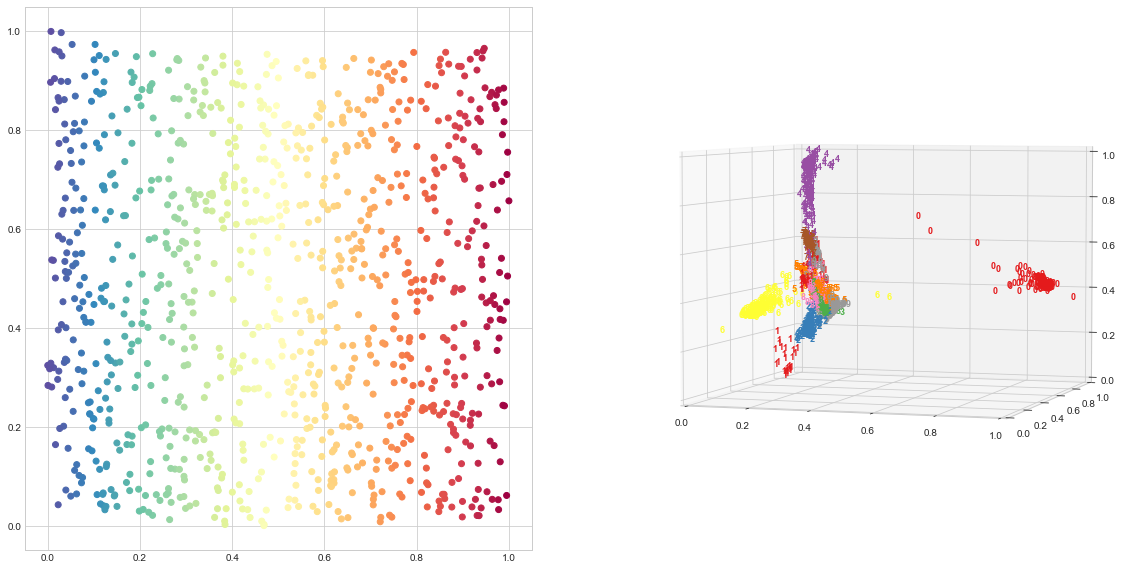

In [15]:
fig = plt.figure(figsize=(20, 10))
plot_s_curve(s_curve_hessian, color, 121, '2d')
plot_digits(digits_hessian, labels, 122, '3d')

## Modified Locally Linear Embedding

* 각 이웃에 여러 가중치 벡터를 사용
* n_neighbors > n_components를 만족해야 함

In [16]:
s_curve_mlle = manifold.LocallyLinearEmbedding(n_neighbors=30, n_components=2,
                         method='modified', random_state=0).fit_transform(s_curve)
digits_mlle = manifold.LocallyLinearEmbedding(n_neighbors=30, n_components=3,
                         method='modified', random_state=0).fit_transform(digits)

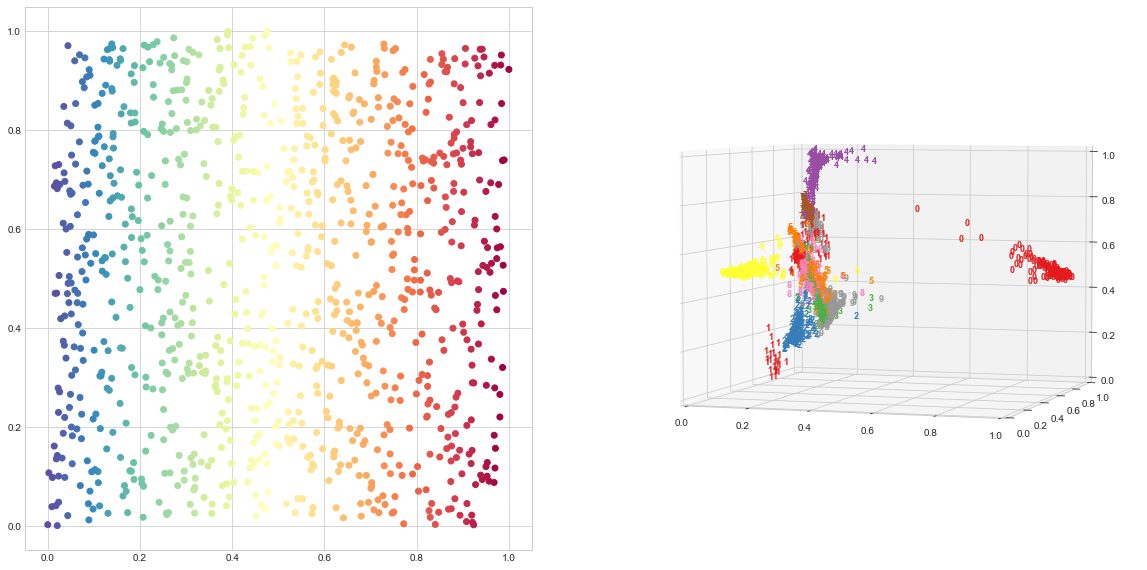

In [17]:
fig = plt.figure(figsize=(20, 10))
plot_s_curve(s_curve_mlle, color, 121, '2d')
plot_digits(digits_mlle, labels, 122, '3d')

## Isomap

* 초기의 다양체 학습 알고리즘
* MDS와 커널 PCA의 확장으로 볼 수 있음
* 모든 점들 사이의 측지 거리를 유지하는 저차원 임베딩을 찾음

In [18]:
s_curve_isomap = manifold.Isomap(n_neighbors=30, n_components=2).fit_transform(s_curve)
digits_isomap = manifold.Isomap(n_neighbors=30, n_components=3).fit_transform(digits)

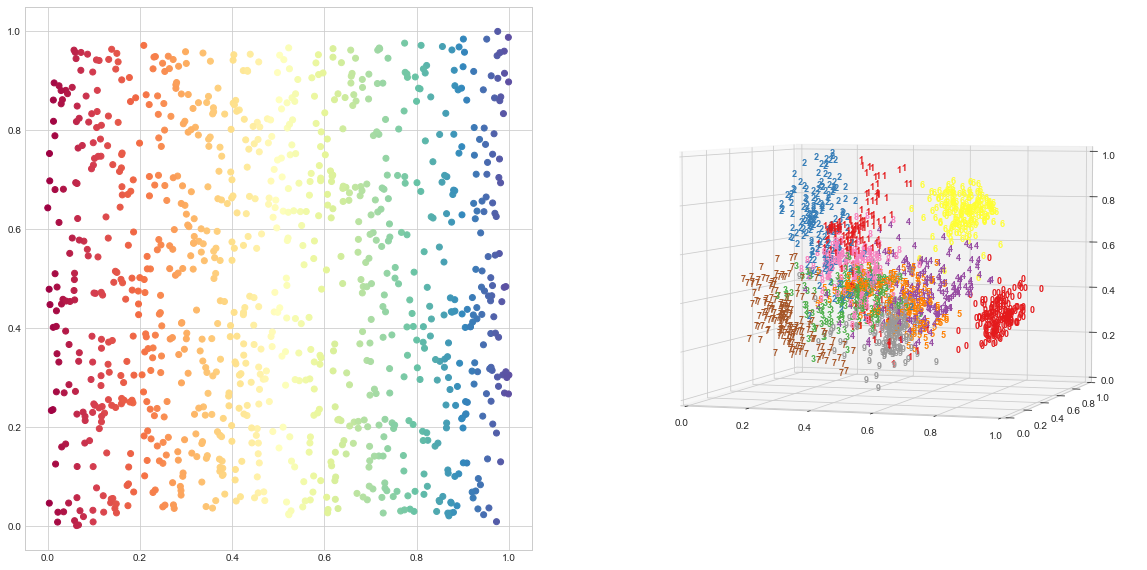

In [19]:
fig = plt.figure(figsize=(20, 10))
plot_s_curve(s_curve_isomap, color, 121, '2d')
plot_digits(digits_isomap, labels, 122, '3d')

## Multi-Dimensional Scaling (MDS)

* 고차원 공간에서의 거리를 고려하는 저차원 공간을 찾음

In [20]:
s_curve_MDS = manifold.MDS( n_components=2, random_state=0).fit_transform(s_curve)
digits_MDS = manifold.MDS( n_components=3,random_state=0).fit_transform(digits)

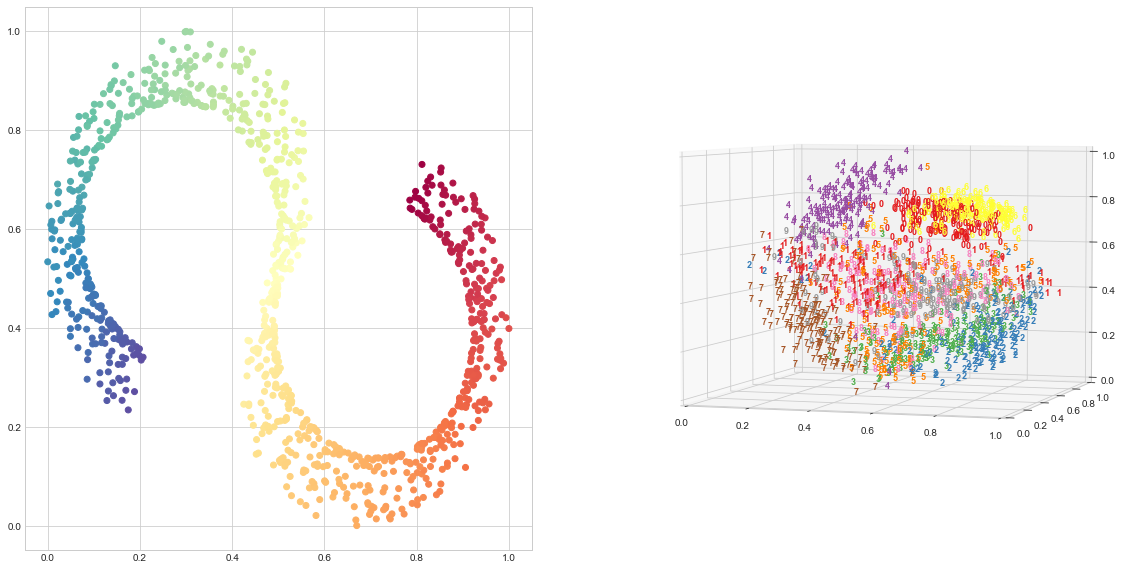

In [21]:
fig = plt.figure(figsize=(20, 10))
plot_s_curve(s_curve_MDS, color, 121, '2d')
plot_digits(digits_MDS, labels, 122, '3d')

## Spectral Embedding

* 스펙트럼 분해를 통해 데이터의 저차원 표현을 찾음
* 데이터의 점이 저차원 공간에서도 서로 가깝게 유지되도록 함

In [23]:
s_curve_se = manifold.SpectralEmbedding( n_components=2, random_state=0).fit_transform(s_curve)
digits_se = manifold.SpectralEmbedding( n_components=3,random_state=0).fit_transform(digits)

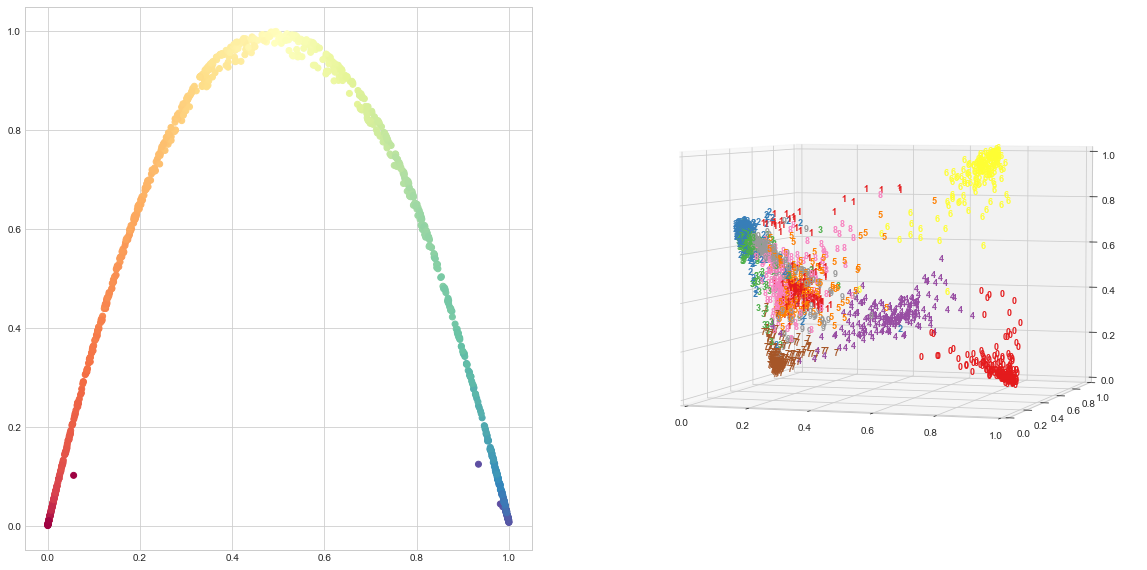

In [24]:
fig = plt.figure(figsize=(20, 10))
plot_s_curve(s_curve_se, color, 121, '2d')
plot_digits(digits_se, labels, 122, '3d')

## t-distributed Stochastic Neighbor Embedding (t-SNE)

* 데이터 포인트의 유사성을 확률로 변환
* 국소 구조에 민감
* 국소 구조를 기반으로 샘플 그룹을 추출하는데 강함
* 항상 KL발산의 국소 최소값에서 끝남
* 계산 비용이 많이 듬
* 전역 구조를 보존하지 않음

In [25]:
s_curve_tsne = manifold.TSNE( n_components=2, random_state=0).fit_transform(s_curve)
digits_tsne = manifold.TSNE( n_components=3,random_state=0).fit_transform(digits)

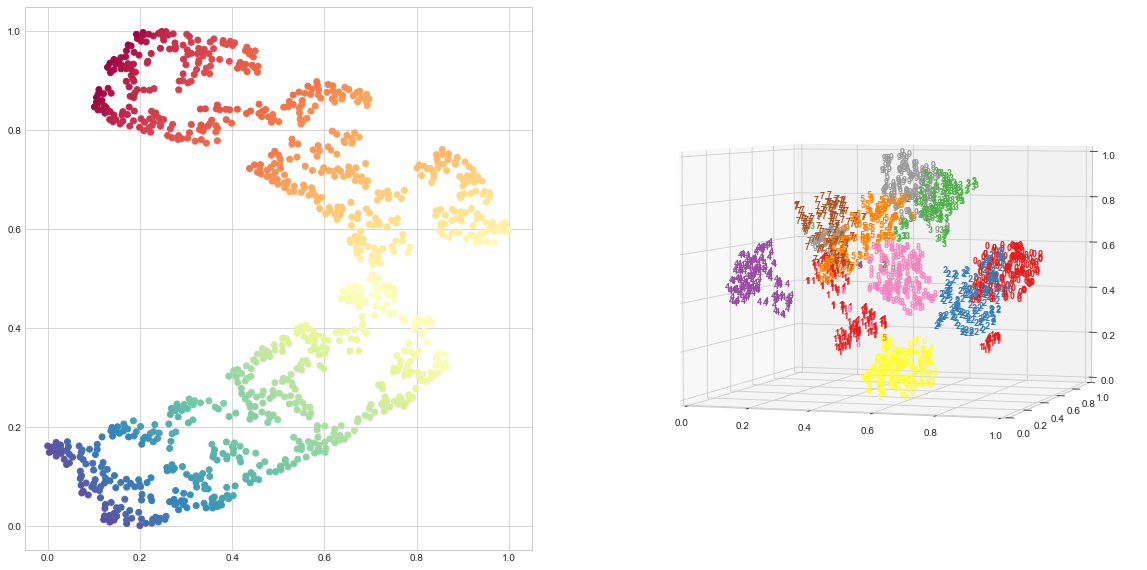

In [26]:
fig = plt.figure(figsize=(20, 10))
plot_s_curve(s_curve_tsne, color, 121, '2d')
plot_digits(digits_tsne, labels, 122, '3d')

In [27]:

digits_tsne = manifold.TSNE( n_components=2,random_state=0).fit_transform(digits)

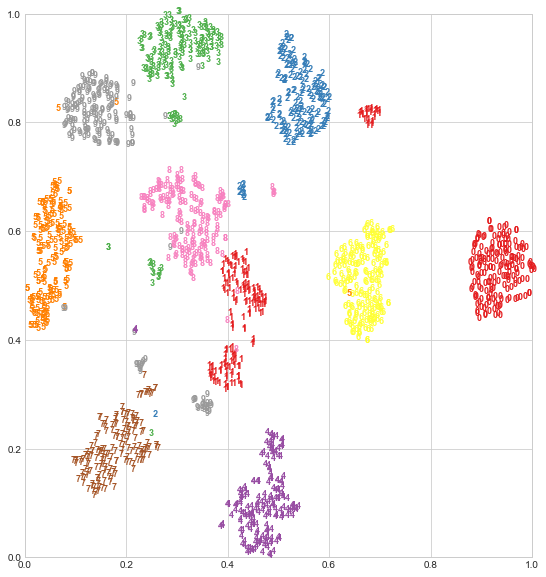

In [28]:
fig = plt.figure(figsize=(20, 10))
plot_digits(digits_tsne, labels, 121, '2d')

## 정제된 표현을 이용한 학습
* 다양체 학습의 결과를 정제된 데이터로 생각할 수 있음
* 정제된 표현이기 때문에 분석에 비교적 용이함
* 기계학습 모델의 입력으로 사용했을때 성능향상을 기대할 수 있음

In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [30]:
raw_digits, target = datasets.load_digits(return_X_y=True)

In [31]:
knn = KNeighborsClassifier()
svm = SVC()
decition_Tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()

### 원본 데이터를 사용할 때

#### KNN

In [32]:
model = knn
score = cross_val_score(\
                        estimator=model, 
                        X=raw_digits, y=target,
                        cv= 5)

score

array([0.94722222, 0.95555556, 0.96657382, 0.98050139, 0.9637883 ])

In [33]:
print("{}s cross_val_score  mean: {} (+/-) {}".format(str(type(model)).split('.')[-1][:-1],score.mean(), score.std()))

KNeighborsClassifier's cross_val_score  mean: 0.9627282575054161 (+/-) 0.011168537355954218


#### SVM

In [34]:
model=svm
score = cross_val_score(\
                        estimator=model, 
                        X=raw_digits, y=target,
                        cv= 5)

score

array([0.96111111, 0.94444444, 0.98328691, 0.98885794, 0.93871866])

In [35]:
print("{}s cross_val_score  mean: {} (+/-) {}".format(str(type(model)).split('.')[-1][:-1],score.mean(), score.std()))

SVC's cross_val_score  mean: 0.9632838130609718 (+/-) 0.02008605863225686


#### Decision Tree

In [36]:
model=decition_Tree
score = cross_val_score(\
                        estimator=model, 
                        X=raw_digits, y=target,
                        cv= 5)

score

array([0.75833333, 0.71944444, 0.79387187, 0.81615599, 0.79387187])

In [37]:
print("{}s cross_val_score  mean: {} (+/-) {}".format(str(type(model)).split('.')[-1][:-1],score.mean(), score.std()))

DecisionTreeClassifier's cross_val_score  mean: 0.7763354998452492 (+/-) 0.033945220062590147


#### Random Forest

In [38]:
model=random_forest
score = cross_val_score(\
                        estimator=model, 
                        X=raw_digits, y=target,
                        cv= 5)

score

array([0.93611111, 0.93055556, 0.95543175, 0.96100279, 0.92200557])

In [39]:
print("{}s cross_val_score  mean: {} (+/-) {}".format(str(type(model)).split('.')[-1][:-1],score.mean(), score.std()))

RandomForestClassifier's cross_val_score  mean: 0.9410213556174559 (+/-) 0.014846957149631624


### 정제된 데이터를 사용할 때

#### KNN

In [40]:
model=knn
score = cross_val_score(\
                        estimator=model, 
                        X=digits_tsne, y=target,
                        cv= 5)

score

array([0.96666667, 0.96666667, 0.98050139, 0.98885794, 0.95821727])

In [41]:
print("with Manifolded {}s cross_val_score  mean: {} (+/-) {}".format(str(type(model)).split('.')[-1][:-1],score.mean(), score.std()))

with Manifolded KNeighborsClassifier's cross_val_score  mean: 0.9721819870009284 (+/-) 0.010983175406835348


#### SVM

In [42]:
model=svm
score = cross_val_score(\
                        estimator=model, 
                        X=digits_tsne, y=target,
                        cv= 5)

score

array([0.94722222, 0.93055556, 0.96935933, 0.98607242, 0.93593315])

In [43]:
print("with Manifolded {}s cross_val_score  mean: {} (+/-) {}".format(str(type(model)).split('.')[-1][:-1],score.mean(), score.std()))

with Manifolded SVC's cross_val_score  mean: 0.9538285360569484 (+/-) 0.020911211385339742


#### Decision Tree

In [45]:
model=decition_Tree
score = cross_val_score(\
                        estimator=model, 
                        X=digits_tsne, y=target,
                        cv= 5)

score

array([0.93055556, 0.89444444, 0.98050139, 0.98328691, 0.93871866])

In [46]:
print("with Manifolded {}s cross_val_score  mean: {} (+/-) {}".format(str(type(model)).split('.')[-1][:-1],score.mean(), score.std()))

with Manifolded DecisionTreeClassifier's cross_val_score  mean: 0.9455013927576601 (+/-) 0.0332533926460481


#### Random Forest

In [47]:
model=random_forest
score = cross_val_score(\
                        estimator=model, 
                        X=digits_tsne, y=target,
                        cv= 5)

score

array([0.97222222, 0.94722222, 0.98050139, 0.98885794, 0.95264624])

In [48]:
print("with Manifolded {}s cross_val_score  mean: {} (+/-) {}".format(str(type(model)).split('.')[-1][:-1],score.mean(), score.std()))

with Manifolded RandomForestClassifier's cross_val_score  mean: 0.9682900030950169 (+/-) 0.015976226645845526
